In [118]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [119]:
df = pd.read_csv("./data/cs-training.csv")

In [120]:
df.describe

<bound method DataFrame.describe of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
5                6                 0                              0.213179   
6                7                 0                              0.305682   
7                8                 0                              0.754464   
8                9                 0                              0.116951   
9               10                 0                              0.189169   
10              11                 0                              0.644226   
11              12          

In [121]:
df.shape

(150000, 12)

In [122]:
df['age'].mean()

52.295206666666665

In [123]:
df['age'].median()

52.0

In [124]:
df['age'].mode()

0    49
dtype: int64

In [125]:
df['age'].skew()

0.18899454512676725

In [126]:
x = np.arange(df['age'].min(), df['age'].max())

In [127]:
df.loc[df['age'] < 18]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1,0,1,0.436927,6000,6,0,2,0,2


In [128]:
df['age'].max()

109

In [129]:
df.loc[df['age'] > 100]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7763,7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0
19884,19885,0,1.000000,103,0,0.000000,1600,3,0,0,0,0
25561,25562,0,0.009866,102,0,0.002424,3300,3,0,0,0,0
40007,40008,0,0.064748,107,0,939.000000,NaN,9,0,1,0,0
56761,56762,0,0.003469,105,0,2.000000,NaN,4,0,0,0,NaN
57967,57968,0,0.001397,103,0,1798.500000,1,11,0,2,0,0
90937,90938,0,0.000000,102,0,0.000000,NaN,12,0,0,0,0
93813,93814,0,0.025780,101,0,0.013797,1666,5,0,0,0,0
96450,96451,0,0.109642,102,0,0.273844,3417,7,0,0,0,1
105790,105791,0,0.109307,109,0,2141.000000,NaN,17,0,1,0,NaN


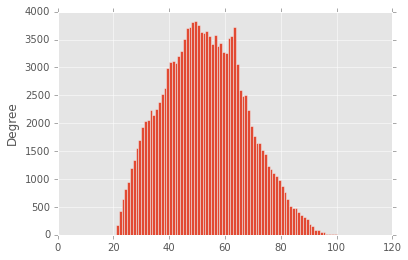

In [130]:
df['age'].plot(kind='hist', stacked=False, bins=df['age'].max())

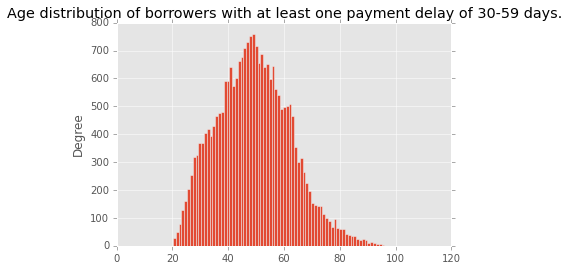

In [131]:
df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] > 0]['age'].plot(
    kind='hist', 
    bins=100, 
    title='Age distribution of borrowers with at least one payment delay of 30-59 days.')

In [132]:
df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] > 0].shape

(23982, 12)

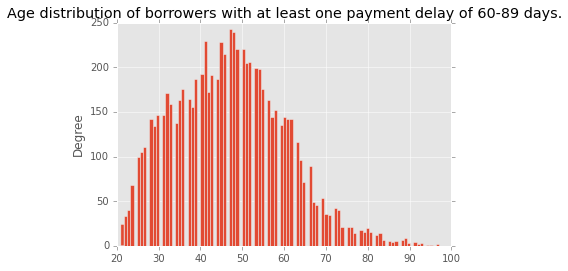

In [133]:
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] > 0]['age'].plot(
    kind='hist', 
    bins=100, 
    title='Age distribution of borrowers with at least one payment delay of 60-89 days.')

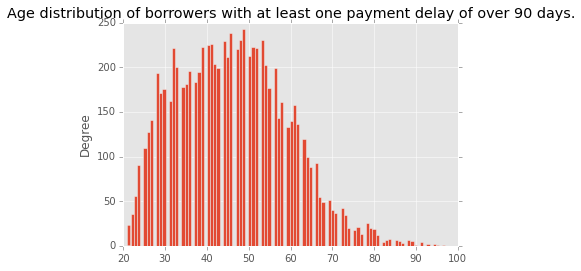

In [134]:
df.loc[df['NumberOfTimes90DaysLate'] > 0]['age'].plot(
    kind='hist', 
    bins=100, 
    title='Age distribution of borrowers with at least one payment delay of over 90 days.')

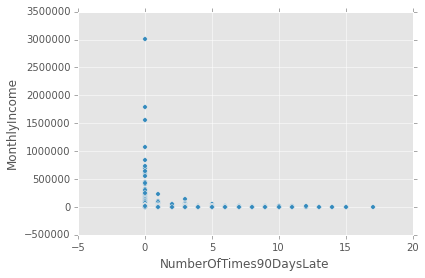

In [135]:
df.loc[df['NumberOfTimes90DaysLate'] < 80].plot(kind='scatter', x='NumberOfTimes90DaysLate', y='MonthlyIncome')

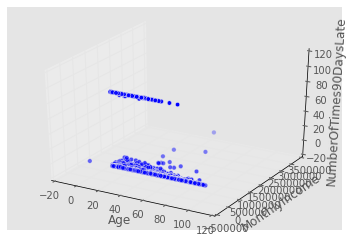

In [136]:
threed = plt.figure().gca(projection='3d')
threed.scatter(df['age'], df['MonthlyIncome'], df['NumberOfTimes90DaysLate'])
threed.set_xlabel('Age')
threed.set_ylabel('MonthlyIncome')
threed.set_zlabel('NumberOfTimes90DaysLate')
plt.show()

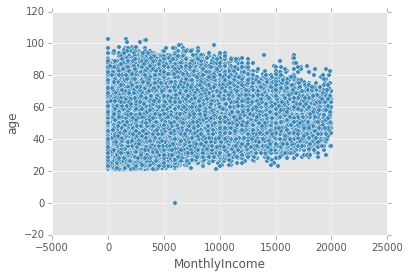

In [137]:
df.loc[df['MonthlyIncome'] < 20000].plot(kind='scatter', x='MonthlyIncome', y='age')
plt.show()

In [138]:
def calculate_distress(client):
    if (client['NumberOfTime30-59DaysPastDueNotWorse'] > 0 or client['NumberOfTime60-89DaysPastDueNotWorse'] > 0 or client['NumberOfTimes90DaysLate']):
        return 1
    return 0



In [139]:
distress = df.apply(lambda client: calculate_distress(client), axis=1)



In [140]:
df.drop(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45,0.802982,9120,13,6,2
1,2,0,0.957151,40,0.121876,2600,4,0,1
2,3,0,0.658180,38,0.085113,3042,2,0,0
3,4,0,0.233810,30,0.036050,3300,5,0,0
4,5,0,0.907239,49,0.024926,63588,7,1,0
5,6,0,0.213179,74,0.375607,3500,3,1,1
6,7,0,0.305682,57,5710.000000,NaN,8,3,0
7,8,0,0.754464,39,0.209940,3500,8,0,0
8,9,0,0.116951,27,46.000000,NaN,2,0,NaN
9,10,0,0.189169,57,0.606291,23684,9,4,2


In [141]:
LR = LogisticRegression(penalty='l1', tol=0.01)

In [149]:
dfclean = df.fillna(df.mean())


In [150]:
LR.fit(dfclean, distress)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.01,
          verbose=0)

In [153]:
print LR.predict(dfclean.loc[[0]])

[1]


In [155]:
distress.loc[[0]]

0    1
dtype: int64

In [157]:
test = pd.read_csv('data/cs-test.csv')

In [158]:
distress_test = test.apply(lambda client: calculate_distress(client), axis=1)

In [165]:
test_clean = test.fillna(test.mean())
print test_clean

        Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1               NaN                              0.885519   
1                2               NaN                              0.463295   
2                3               NaN                              0.043275   
3                4               NaN                              0.280308   
4                5               NaN                              1.000000   
5                6               NaN                              0.509791   
6                7               NaN                              0.587778   
7                8               NaN                              0.046149   
8                9               NaN                              0.013527   
9               10               NaN                              1.000000   
10              11               NaN                              0.028485   
11              12               NaN                            

In [164]:
test_pred = LR.predict(test_clean)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
roc_auc = sk.metrics.roc_auc_score(test_clean)